carbon emisssion prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea
import sklearn
plt.style.use('seaborn')     
np.__version__  

'1.21.6'

In [15]:
df = pd.read_csv('/content/co2datasheet.csv')

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [17]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [18]:
df.isnull().any()

Make                                False
Model                               False
Vehicle Class                       False
Engine Size(L)                      False
Cylinders                           False
Transmission                        False
Fuel Type                           False
Fuel Consumption City (L/100 km)    False
Fuel Consumption Hwy (L/100 km)     False
Fuel Consumption Comb (L/100 km)    False
Fuel Consumption Comb (mpg)         False
CO2 Emissions(g/km)                 False
dtype: bool

In [19]:
type(df['Model'])

pandas.core.series.Series

In [ ]:
np.array(df['Model'])
# df['Model'].values returns the values in numpy array format

taking others as parameters co2 emission is the target variable

In [20]:
cols = df.columns

In [21]:
for i in range(len(cols)):
    print(i, cols[i])

0 Make
1 Model
2 Vehicle Class
3 Engine Size(L)
4 Cylinders
5 Transmission
6 Fuel Type
7 Fuel Consumption City (L/100 km)
8 Fuel Consumption Hwy (L/100 km)
9 Fuel Consumption Comb (L/100 km)
10 Fuel Consumption Comb (mpg)
11 CO2 Emissions(g/km)


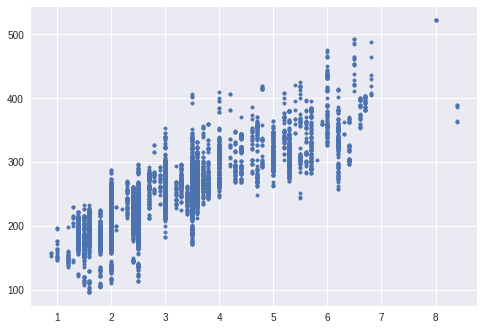

In [22]:
plt.scatter(x = df[cols[3]], y =df[cols[-1]], marker = '.')

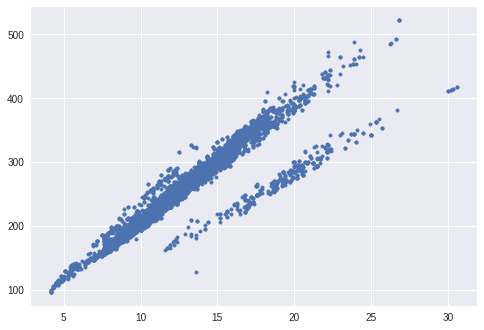

In [23]:
plt.scatter(x = df[cols[7]], y = df[cols[-1]], marker = '.')

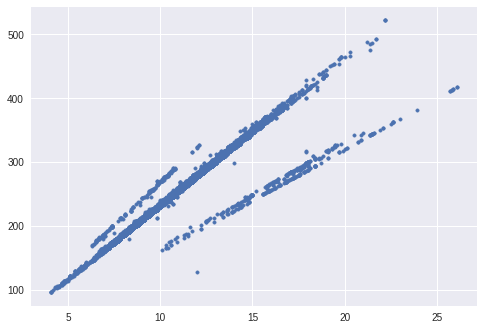

In [24]:
plt.scatter(x = df[cols[9]], y = df[cols[-1]], marker = '.')

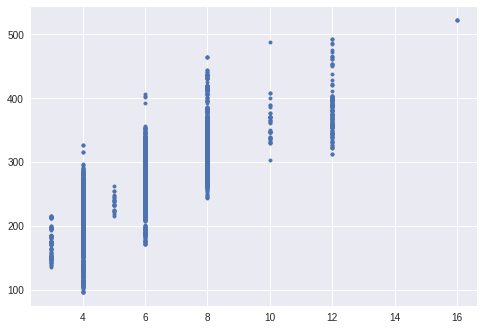

In [25]:
plt.scatter(x = df[cols[4]], y = df[cols[-1]], marker = '.')

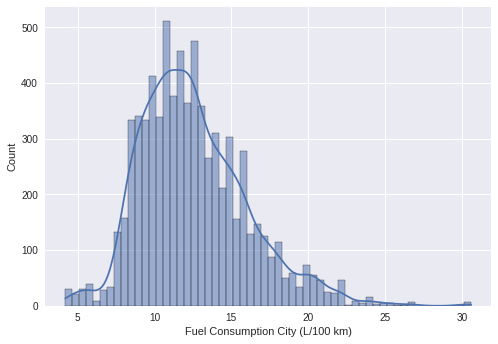

In [26]:
sea.histplot(x = 'Fuel Consumption City (L/100 km)', data = df, kde = True)

In [27]:
df['Fuel Consumption City (L/100 km)'].values.mean()

12.556533513879485

we get the entire values of data and their distributions with the help of the above graphs 

we now start training the model

In [28]:
df_train = df[[cols[3], cols[4], cols[7], cols[8], cols[9]]]

df_train.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9
3,3.5,6,12.7,9.1,11.1
4,3.5,6,12.1,8.7,10.6


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train.values, df[cols[-1]].values, test_size = 0.1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6646, 5), (6646,), (739, 5), (739,))

use the sgd optimizer


In [30]:
from sklearn import linear_model

model = linear_model.SGDRegressor(verbose = 1)

model.fit(x_train, y_train)


-- Epoch 1
Norm: 20.80, NNZs: 5, Bias: -16.405516, T: 6646, Avg. loss: 694195.997585
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 20.99, NNZs: 5, Bias: 0.270808, T: 13292, Avg. loss: 448.170321
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 18.16, NNZs: 5, Bias: 10.320717, T: 19938, Avg. loss: 369.660617
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 18.04, NNZs: 5, Bias: 17.920309, T: 26584, Avg. loss: 344.182118
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 16.29, NNZs: 5, Bias: 23.607127, T: 33230, Avg. loss: 311.408249
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 15.19, NNZs: 5, Bias: 28.093015, T: 39876, Avg. loss: 306.183411
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 15.20, NNZs: 5, Bias: 31.928047, T: 46522, Avg. loss: 292.454264
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 14.27, NNZs: 5, Bias: 34.856221, T: 53168, Avg. loss: 289.806240
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 14.57, NNZs: 5, Bias: 37.076695, T: 59814, Av

SGDRegressor(verbose=1)

In [31]:
model.coef_, model.intercept_

(array([ 4.68148298,  6.80333745,  1.41041664,  2.07062318, 10.6667187 ]),
 array([49.24388807]))

In [32]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8692519132547829, 0.883700098657605)

In [33]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8777685635334193, 0.8913972939556616)

In [35]:
pred = model.predict(x_test)
print(pred[:5], y_test[:5])

[170.71938767 323.50720482 199.47650055 178.96935558 197.26933166] [172 338 195 167 189]


In [36]:
x_train, y_train

(array([[ 2. ,  4. , 11.1,  8.4,  9.9],
        [ 1.4,  4. ,  9.4,  7.9,  8.8],
        [ 2.4,  4. , 10.8,  7.6,  9.3],
        ...,
        [ 6.4,  8. , 18.3, 12.6, 15.7],
        [ 2. ,  4. ,  8.7,  7.5,  8.2],
        [ 3. ,  6. , 13.7,  8.9, 11.5]]),
 array([231, 205, 219, ..., 368, 189, 264]))

In [37]:
df[cols[6]].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

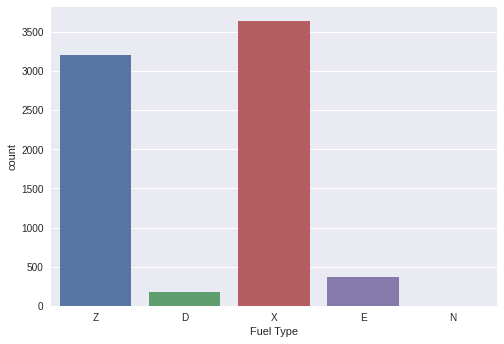

In [38]:
sea.countplot(x = cols[6], data = df)